**Project Description :**

This project involves developing an image classification model to identify different varieties of Tunisian dates from the newly released Deglet Nour Date Fruit Dataset. This dataset contains images representing 11 varieties of dates, with each class containing between 300 and 473 images. The varieties include names such as Alig, Kenta, and Nour demi sèche. The primary goal is to create a computer vision model capable of classifying these images based on the variety of dates.

**Objective :**

The objective is to explore advanced image classification techniques, using Convolutional Neural Networks (CNNs), to develop a high-performing model capable of distinguishing between the varieties of dates based on their visual characteristics.



**Released by :**

*   Abed El Aziz Bouebsa
*   Ayoub Zerdoum
*   Ghazi Oumari






**Methodology :**

The project follows the CRISP-DM methodology, beginning with the Business Understanding phase, where the project's objectives and success criteria are defined. This will be followed by the Data Understanding phase, where the Deglet Nour Date Fruit Dataset will be analyzed to ensure quality and relevance. In the Data Preparation phase, images will be pre-processed and normalized to ensure consistency. Then, we will move to the Modeling phase, where a CNN model will be constructed to extract relevant visual features from the images. This will include building convolutional and pooling layers, followed by fully connected layers for classification. The Evaluation phase will assess the model's performance, and finally, the Deployment phase will involve making the model interpretable and actionable using techniques like XAI (Explainable AI). This methodology ensures a comprehensive approach to solving the classification task while meeting business objectives.






**I-Business Understanding :**


The goal of this project is to classify Tunisian date varieties based on images, specifically using a Convolutional Neural Network (CNN) to identify distinguishing visual characteristics. This approach is critical for stakeholders such as farmers, researchers, and agricultural businesses, as it enables accurate identification and classification of date varieties, which is essential for improving production quality and market value. The model's success will be measured by its precision, interpretability, and ability to generalize to new, unseen data. By leveraging this technology, businesses can enhance product differentiation, streamline supply chains, and provide actionable insights to farmers for better crop management.



**II-Data Understanding :**

The dataset for this project is sourced from Kaggle, specifically the Deglet Nour Date Fruit Dataset, which contains images of 11 different Tunisian date varieties. These varieties include:

*   Bessra
*   Deglet Nour Dryer
*   Deglet Nour Oily
*   Deglet Nour Semi-Oily Treated
*   Deglet Nour Semi-Dryer
*   Alig
*   Kenta
*   Deglet Nour Oily Treated
*   Deglet Nour Semi-Dryer Treated
*   Deglet Nour Semi-Oily
*   Deglet Nour



Each class is composed of between 300 to 473 images. These images represent the visual characteristics of the various date varieties, which will be essential for training the model. The diversity in appearance and texture across these varieties will challenge the model to identify and classify key features, such as color, shape, and texture, that are unique to each variety.

This dataset provides the foundation for developing a robust model that can accurately classify different date varieties based on these distinctive visual characteristics.









**III-Data Processing**

In [ ]:
"""
The Deglet Nour Date Fruit Dataset used in this project is confidential
and restricted to authorized personnel only. Access to the dataset
requires proper authorization and is intended for sharing among
approved team members and collaborators.
"""

**This script processes the dataset by performing the following steps:**









*   Count the Files: It counts the number of files in the subdirectories for the training, testing, and validation sets.
*   Generate a DataFrame: It creates a DataFrame containing the file paths of images and their corresponding class labels.
*   Combine Data: The data from the training, testing, and validation sets are concatenated into a single DataFrame.
*   Save Data: The final DataFrame is saved to a CSV file for easy access and further analysis.











In [ ]:
import os
import pandas as pd

# Function to count files in subdirectories
def count_files_in_subdirs(directory, set_name):
    counts = {}
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            counts[item] = len(os.listdir(item_path))
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Function to generate a DataFrame with class names and image file paths
def get_image_paths_and_classes(directory, set_name):
    data = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                data.append({"Set": set_name, "Class": class_name, "FilePath": file_path})
    return pd.DataFrame(data)

# Path to your dataset
dataset_path = 'C:/Users/boubs/.cache/kagglehub/datasets/rahmaabed/croped-date-dataset/versions/2/Date_Dataset/'

# Subdirectories for train, test, and validation
train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')
val_dir = os.path.join(dataset_path, 'Validation')

# Count files in each subset
train_count = count_files_in_subdirs(train_dir, 'train')
test_count = count_files_in_subdirs(test_dir, 'test')
val_count = count_files_in_subdirs(val_dir, 'validation')

# Generate DataFrame for file paths and classes
train_data = get_image_paths_and_classes(train_dir, 'train')
test_data = get_image_paths_and_classes(test_dir, 'test')
val_data = get_image_paths_and_classes(val_dir, 'validation')

# Combine all data into a single DataFrame
all_data = pd.concat([train_data, test_data, val_data], ignore_index=True)

# Display counts
print("Training set file counts:\n", train_count)
print("Testing set file counts:\n", test_count)
print("Validation set file counts:\n", val_count)

# Display the combined DataFrame
print("Combined DataFrame of image paths and classes:\n", all_data)

# Save DataFrame to a CSV file if needed
all_data.to_csv("dataset_file_paths_and_classes.csv", index=False)


Training set file counts:
        alig  bessra  Deglet Nour dryer  Deglet Nour oily  \
train   326     159                231               225   

       Deglet Nour oily treated  Deglet Nour semi-dryer  \
train                       258                     227   

       Deglet Nour semi-dryer treated  Deglet Nour semi-oily  \
train                             220                    229   

       Deglet Nour semi-oily treated  kenta  kintichi  
train                            270    224       209  
Testing set file counts:
       alig  bessra  Deglet Nour dryer  Deglet Nour oily  \
test    47      23                 33                32   

      Deglet Nour oily treated  Deglet Nour semi-dryer  \
test                        37                      33   

      Deglet Nour semi-dryer treated  Deglet Nour semi-oily  \
test                              31                     32   

      Deglet Nour semi-oily treated  kenta  kintichi  
test                             38     32      

In [ ]:
train_count.transpose().plot(kind='bar')
test_count.transpose().plot(kind='bar')
val_count.transpose().plot(kind='bar')

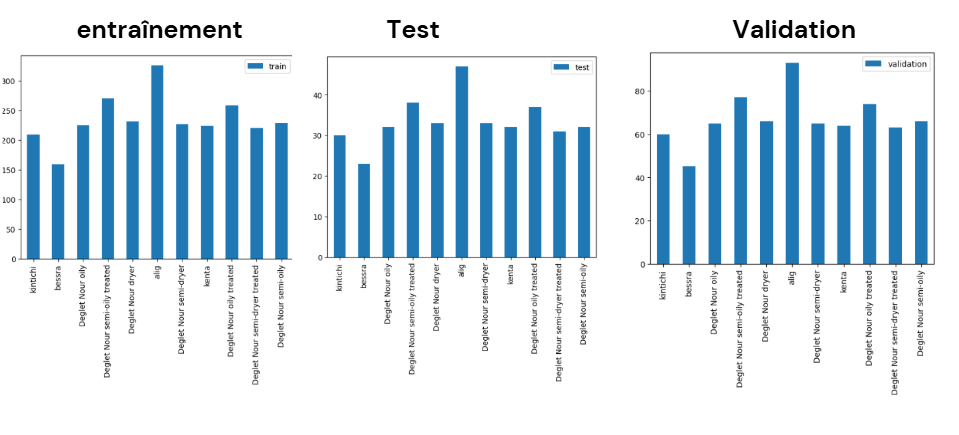

**Image Enhancement and Visualization**


This code is designed to process and enhance images of dates from the dataset. It performs several key operations:

* Resizing: The image is resized to a standard dimension (224x224 pixels), which is commonly used for deep learning models.  
*   Normalization: The pixel values are normalized to enhance the contrast and improve the image quality for better feature extraction.
*   Sharpening: The image is sharpened using a convolutional filter, which enhances edges and improves clarity.
*  CLAHE (Contrast Limited Adaptive Histogram Equalization): This technique is applied to enhance the local contrast of the image, making it more focused.
*   The script then displays the original and enhanced images side by side for visual comparison, showing the impact of these enhancements on the quality of the images.













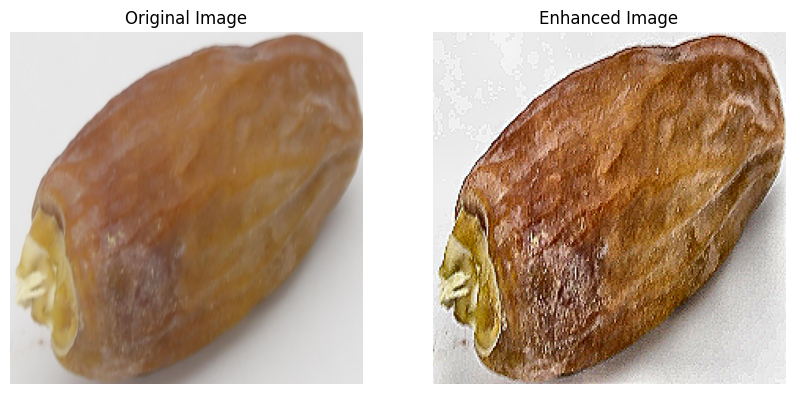

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def enhance_image(image_path, new_width=224, new_height=224):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_ANYCOLOR)

    if img is None:
        raise ValueError(f"Unable to load image at {image_path}")

    # Resize the image
    resized_img = cv2.resize(img, (new_width, new_height))

    # Normalize to enhance contrast
    normalized_img = cv2.normalize(resized_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Sharpen the image using a kernel
    #sharpening kernel or sharpening filter. It is a type of convolution kernel used to enhance the edges of an image and make it appear sharper.
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_img = cv2.filter2D(normalized_img, -1, kernel)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) for better focus
    lab = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return enhanced_img

# Usage example
path = "C:/Users/boubs/.cache/kagglehub/datasets/rahmaabed/croped-date-dataset/versions/2/Date_Dataset/Train/Deglet Nour dryer/secheNour_73_jpg.rf.262378a8796b7e3e0f3dae3d5a1fa6e8.jpg"

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis('off')
img = cv2.imread(path, cv2.IMREAD_ANYCOLOR)
if img is None:
    raise ValueError(f"Image not found at {path}")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img_rgb)

# Display enhanced image
enhanced = enhance_image(path)
enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.axis('off')
plt.imshow(enhanced_rgb)

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
# Chemins et classes
data = []
width=224
height=224
for _, row in all_data.iterrows():


    image=enhance_image(row['FilePath'],width,height)



    image_array = img_to_array(image) / 255.0  # Normalisation
    data.append((image_array, row['Class']))

# Conversion en numpy arrays
images, labels = zip(*data)
images = np.array(images)
labels = np.array(labels)

# Encodage des labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Division des ensembles
train_images = images[all_data['Set'] == 'train']
train_labels = labels_encoded[all_data['Set'] == 'train']
val_images = images[all_data['Set'] == 'validation']
val_labels = labels_encoded[all_data['Set'] == 'validation']
test_images = images[all_data['Set'] == 'test']
test_labels = labels_encoded[all_data['Set'] == 'test']


**IV-Model Building and Cross-Validation with Data Augmentation**


In this section, a Convolutional Neural Network (CNN) model is built and trained to classify the 11 different varieties of Tunisian dates. The process involves:

**Data Augmentation:** The training data is augmented on-the-fly using various
transformations like rotation, zoom, horizontal flipping, and shear. This increases the diversity of the training data, helping the model generalize better.


**CNN Architecture:** The model consists of multiple convolutional layers with different types of pooling layers (AveragePooling and MaxPooling), followed by fully connected layers. The final layer outputs the predicted class for each input image using a softmax activation function.

**Cross-Validation:** Stratified K-Fold Cross-Validation with 6 splits is used to ensure the model is validated on different subsets of the data while maintaining class balance.

**Training:** The model is trained for 12 epochs on each fold, using the augmented images for better generalization.
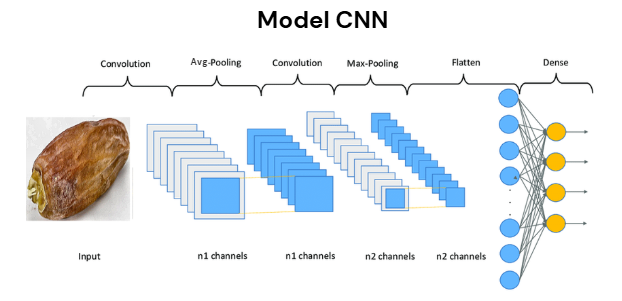


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Image dimensions and class labels (update width and height to match your dataset)
width, height = 224, 224  # Example dimensions, modify as needed

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,        # Random rotation
    shear_range=0.2,          # Shear transformation
    zoom_range=0.1,           # Zoom in/out
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill missing pixels after transformation
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    AveragePooling2D((3, 3)),  # First pooling layer changed to AveragePooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),      # Second pooling layer remains MaxPooling
    Flatten(),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(11, activation='softmax')  # 11 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Cross-validation setup
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)  # Stratified k-fold for class balance

model.summary()

# Perform cross-validation with data augmentation
for train_index, val_index in kfold.split(train_images, train_labels):
    train_images_fold, val_images_fold = train_images[train_index], train_images[val_index]
    train_labels_fold, val_labels_fold = train_labels[train_index], train_labels[val_index]

    # Fit the data generator on the training data
    datagen.fit(train_images_fold)

    # Train the model using the augmented data
    history = model.fit(
        datagen.flow(train_images_fold, train_labels_fold, batch_size=32),
        validation_data=(val_images_fold, val_labels_fold),
        epochs=12
    )


c:\Quantum\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │       7,962,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,067 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,983,179 (30.45 MB)

 Trainable params: 7,983,179 (30.45 MB)

 Non-trainable params: 0 (0.00 B)

c:\Quantum\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 323ms/step - accuracy: 0.1386 - loss: 2.6728 - val_accuracy: 0.2721 - val_loss: 1.9274
Epoch 2/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.2736 - loss: 1.9416 - val_accuracy: 0.4070 - val_loss: 1.8600
Epoch 3/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - accuracy: 0.3658 - loss: 1.7771 - val_accuracy: 0.4000 - val_loss: 1.6229
Epoch 4/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.4526 - loss: 1.5808 - val_accuracy: 0.4256 - val_loss: 1.6549
Epoch 5/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - accuracy: 0.4613 - loss: 1.5078 - val_accuracy: 0.3209 - val_loss: 1.9641
Epoch 6/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - accuracy: 0.4828 - loss: 1.4118 - val_accuracy: 0.4721 - val_loss: 1.4607
Epoch 7/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - accuracy: 0.5316 - loss: 1.2619 - val_accuracy: 0.3488 - val_loss: 2.1434
Epoch 8/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 316ms/step - accuracy: 0.5135 - loss: 1.3354 - val_accu

***Plots the training and validation accuracy and loss.***



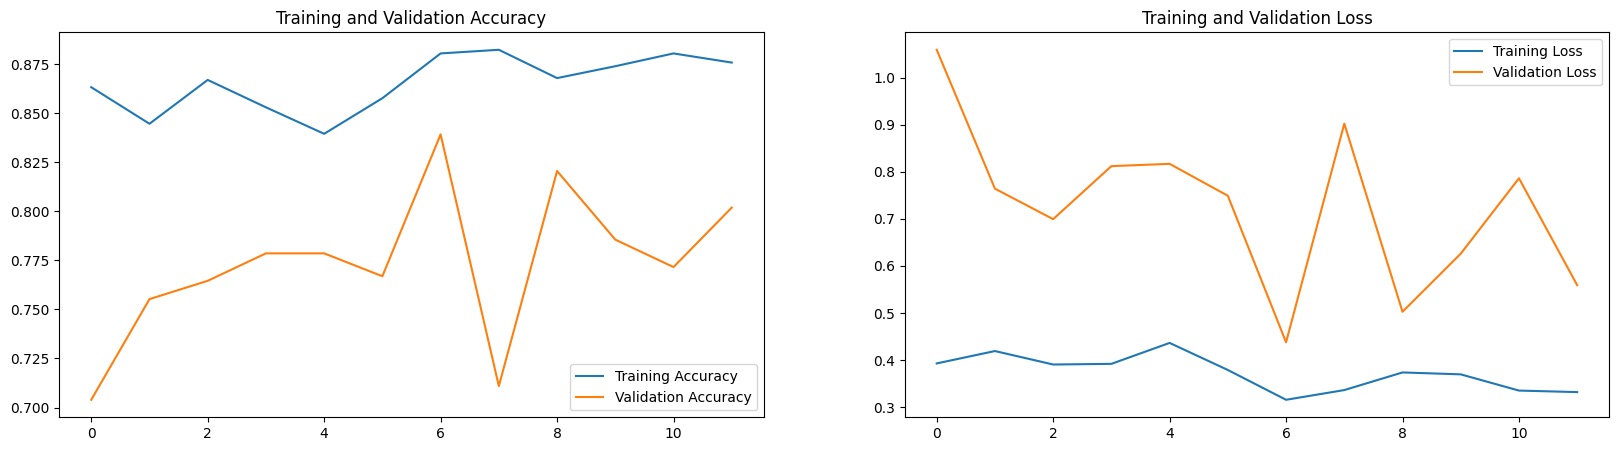

In [ ]:
import matplotlib.pyplot as plt


def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()




plot_training_history(history)



**V-Model Evaluation**


*In this step, the trained CNN model is evaluated using the following metrics and techniques to assess its performance:*




*   **Test Loss and Accuracy:**

 The model is evaluated on the test set to obtain the final test loss and accuracy.
*   **Classification Report:**

 A classification report is generated using classification_report from sklearn, which includes precision, recall, F1-score, and support for each class. This helps in understanding how well the model performs across different classes.
*   **Confusion Matrix:**

 The confusion matrix is calculated to show the number of correct and incorrect predictions for each class. A plot is displayed to visually represent this matrix using ConfusionMatrixDisplay.
*  **ROC Curve:**

  For Binary Classification: If there are only two classes, a Receiver Operating Characteristic (ROC) curve is plotted to evaluate the tradeoff between true positive rate (sensitivity) and false positive rate (1-specificity).
  For Multi-Class Classification: If there are more than two classes, a one-vs-all ROC curve is computed and plotted for each class.












12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7705 - loss: 0.9435
Test Loss: 1.1966
Test Accuracy: 0.7092
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Classification Report:
                                precision    recall  f1-score   support

             Deglet Nour dryer       0.59      0.82      0.68        33
              Deglet Nour oily       0.59      0.41      0.48        32
      Deglet Nour oily treated       0.96      0.62      0.75        37
        Deglet Nour semi-dryer       0.72      0.55      0.62        33
Deglet Nour semi-dryer treated       0.88      0.90      0.89        31
         Deglet Nour semi-oily       0.32      0.59      0.41        32
 Deglet Nour semi-oily treated       0.73      0.71      0.72        38
                          alig       0.78      0.96      0.86        47
                        bessra       1.00      0.78      0.88        23
                         kenta       0.92      0.72      0.81        32
                      kintichi

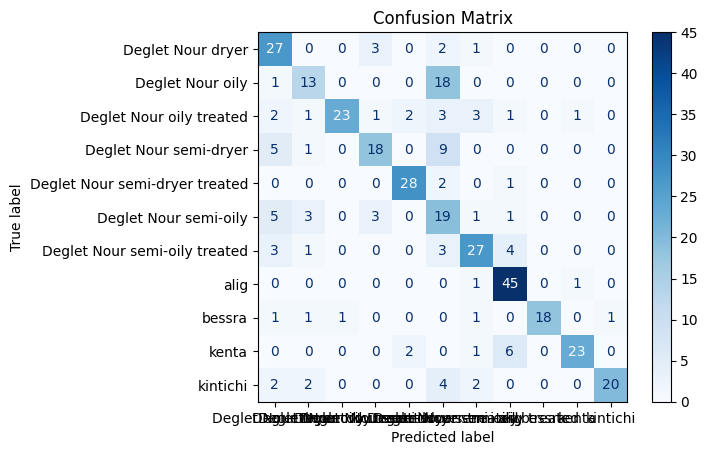

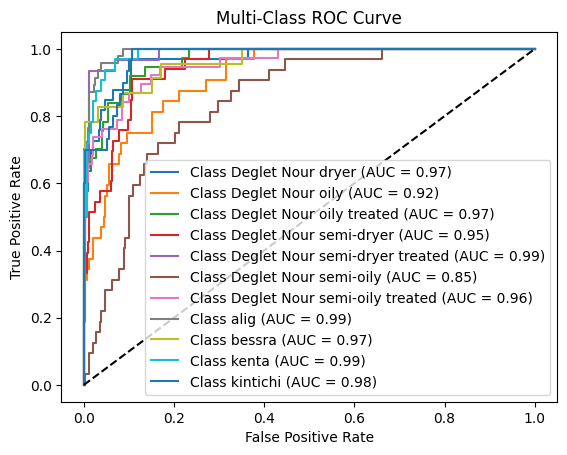

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Classification Report
class_names = label_encoder.classes_
print("Classification Report:")
print(classification_report(test_labels, predicted_classes, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve (for binary classification or one-vs-all for multi-class)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

if len(class_names) == 2:  # Binary Classification
    fpr, tpr, thresholds = roc_curve(test_labels, predictions[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:  # Multi-class ROC
    test_labels_binarized = label_binarize(test_labels, classes=np.arange(len(class_names)))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Multi-Class ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


**VI-XAI : Using LIME**
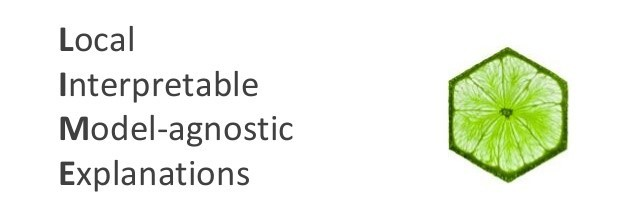

This code is used to visualize and interpret the decision-making process of a deep learning model using the LIME (Local Interpretable Model-agnostic Explanations) technique.

LIME helps explain individual predictions by perturbing input data and observing how the model's predictions change.

The script takes a few sample images from the dataset (or an enhanced version), generates an explanation for each one, and visualizes the important regions in the image that influenced the model’s prediction.

The output is a heatmap highlighting areas that contribute to the decision, making the model’s reasoning more transparent and interpretable.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


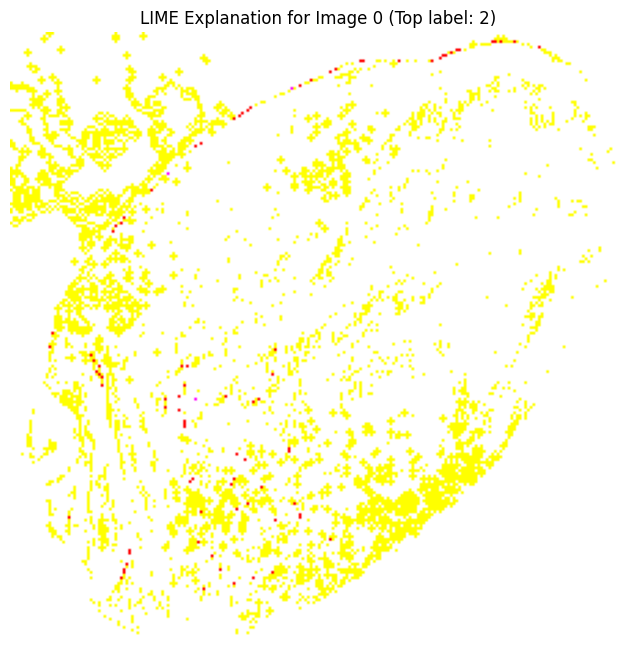

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

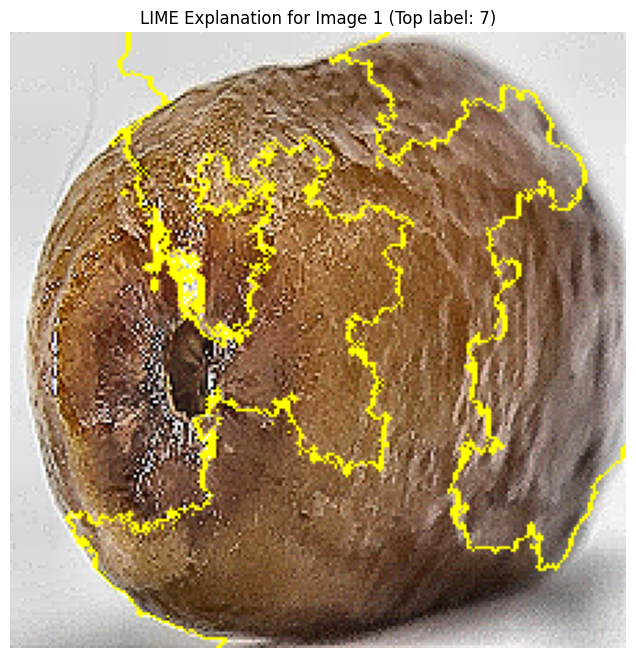

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

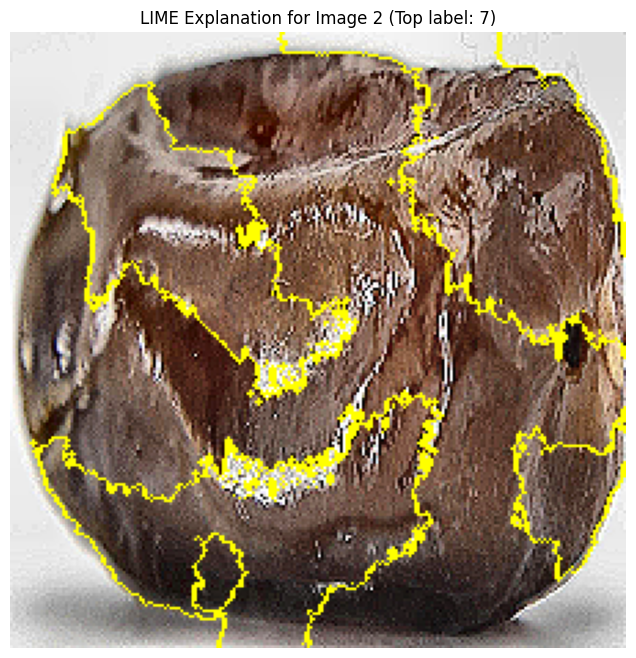

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

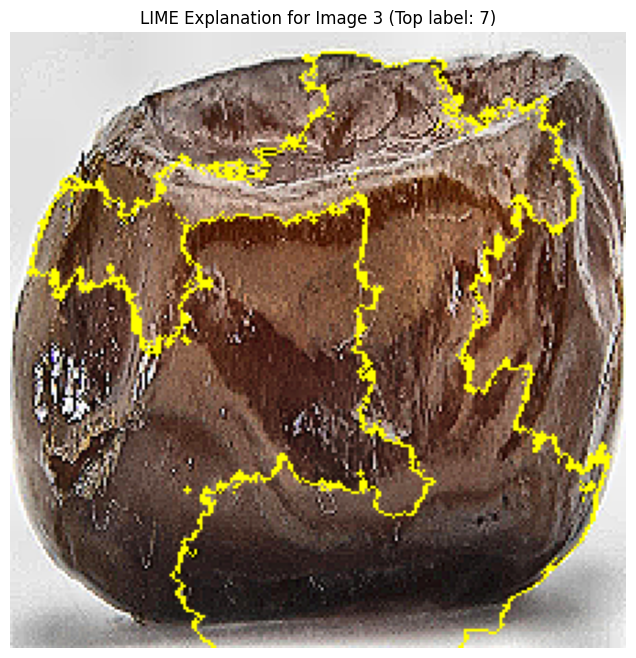

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

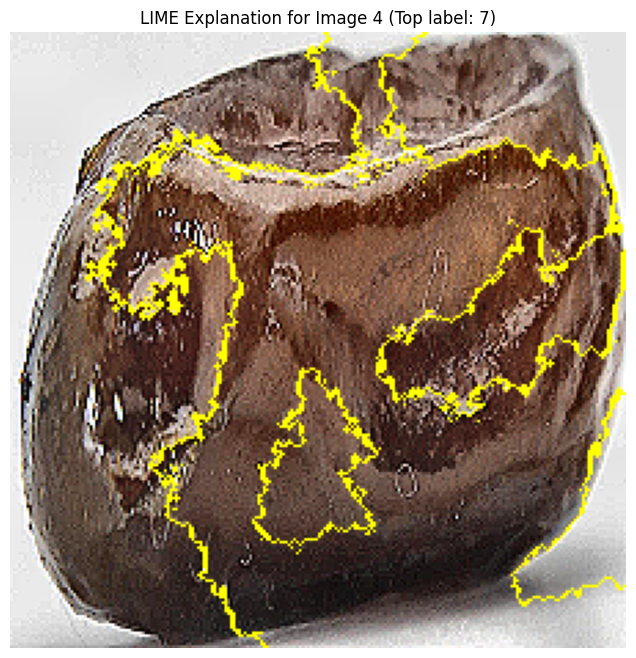

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

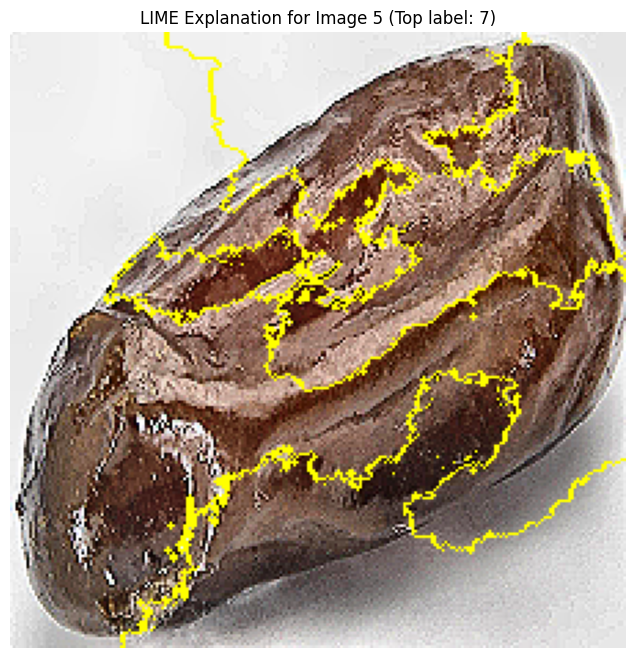

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the LIME explainer
explainer = lime_image.LimeImageExplainer()

# List of indices for 5 sample images (replace with relevant indices)
sample_indices = [-1,0, 1, 2, 3, 4]  # Adjust as per your dataset

# Loop to explain each sample image
for index in sample_indices:
    i = train_images[index] # Retrieve the image by index
    if index == -1 :
        i=enhanced
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    sample_image = np.expand_dims(i, axis=0)  # Expand dims to match model input shape


    # Generate explanation for the current image
    explanation = explainer.explain_instance(
        sample_image[0].astype('double'),  # LIME expects image in [0, 255] range
        model.predict,  # The prediction function of your model
        top_labels=5,  # Analyze predictions for the top 5 labels
        hide_color=0,  # Color for occluded regions
        num_samples=1000  # Number of perturbations for sampling
    )

    # Choose the label with the highest confidence
    top_label = np.argmax(model.predict(sample_image))

    # Get image with mask for the chosen label
    temp, mask = explanation.get_image_and_mask(
        label=top_label,  # Label to explain
        positive_only=True,  # Highlight only features that contribute positively
        num_features=10,  # Number of superpixels to highlight
        hide_rest=False  # Display the full image with highlighted areas
    )

    # Display explanation
    plt.figure(figsize=(8, 8))
    plt.imshow(mark_boundaries(temp, mask))
    plt.title(f"LIME Explanation for Image {index + 1} (Top label: {top_label})")
    plt.axis('off')
    plt.show()
